<a href="https://colab.research.google.com/github/TAUforPython/BioMedAI/blob/main/classifacation_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Cost Personal Datasets

# Liner Regression (RUDN)

In [62]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('insurance.csv')
df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [5]:
df = pd.concat((df, pd.get_dummies(df['sex'])), axis=1)
df = df.drop(['sex'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   object 
 4   region    1338 non-null   object 
 5   expenses  1338 non-null   float64
 6   female    1338 non-null   bool   
 7   male      1338 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(2)
memory usage: 65.5+ KB


In [6]:
df = df.drop(['female'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   object 
 4   region    1338 non-null   object 
 5   expenses  1338 non-null   float64
 6   male      1338 non-null   bool   
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 64.2+ KB


In [7]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [8]:
df = pd.concat((df, pd.get_dummies(df['smoker'])), axis=1)
df = df.drop(['smoker'], axis=1)
df = df.drop(['yes'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   region    1338 non-null   object 
 4   expenses  1338 non-null   float64
 5   male      1338 non-null   bool   
 6   no        1338 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(1)
memory usage: 55.0+ KB


In [9]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
df = pd.concat((df, pd.get_dummies(df['region'])), axis=1)
df = df.drop(['region'], axis=1)
df = df.drop(['southwest'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   bmi        1338 non-null   float64
 2   children   1338 non-null   int64  
 3   expenses   1338 non-null   float64
 4   male       1338 non-null   bool   
 5   no         1338 non-null   bool   
 6   northeast  1338 non-null   bool   
 7   northwest  1338 non-null   bool   
 8   southeast  1338 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 48.5 KB


In [11]:
df.head(2)

,age,bmi,children,expenses,male,no,northeast,northwest,southeast
0,19,27.9,0,16884.92,False,False,False,False,False
1,18,33.8,1,1725.55,True,True,False,False,True


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
X = df.copy()
X = X.drop(['expenses'], axis=1)
Y = df['expenses']

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [30]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [31]:
model.score(X_test, Y_test)

0.6923093639537083

In [32]:
df.head()

,age,bmi,children,expenses,male,no,northeast,northwest,southeast
0,19,27.9,0,16884.92,False,False,False,False,False
1,18,33.8,1,1725.55,True,True,False,False,True
2,28,33.0,3,4449.46,True,True,False,False,True
3,33,22.7,0,21984.47,True,True,False,True,False
4,32,28.9,0,3866.86,True,True,False,True,False


In [41]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


<Axes: ylabel='Frequency'>

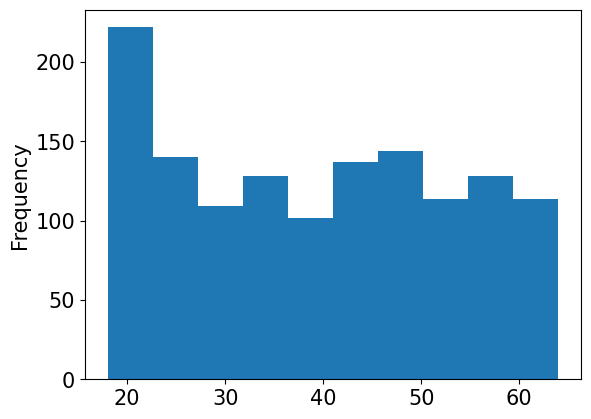

In [43]:
df['age'].plot(kind='hist')

<Axes: xlabel='male'>

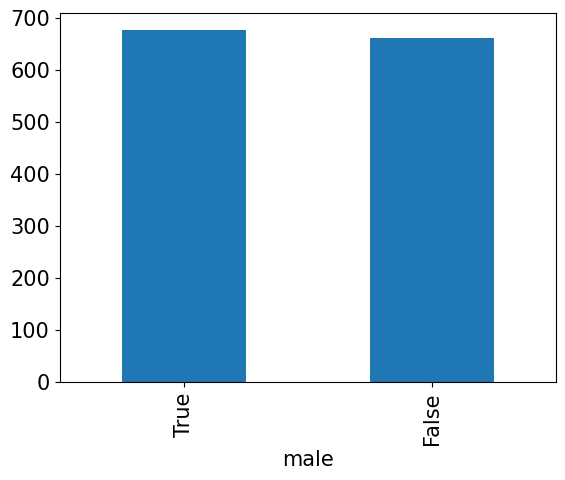

In [46]:
df['male'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

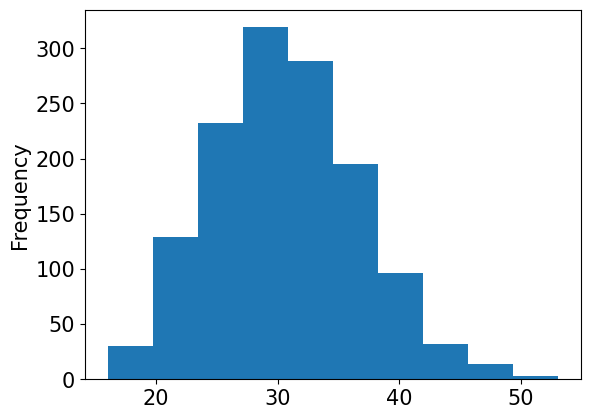

In [48]:
df['bmi'].plot(kind='hist')

In [20]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
model.fit(scaler.fit_transform(X_train), Y_train)

LinearRegression()

In [39]:
model.score(scaler.fit_transform(X_test), Y_test)

0.6415328014680597

# ML linear regression

In [49]:
from sklearn.preprocessing import LabelEncoder

# Create a sample dataframe with categorical data
sexx = pd.DataFrame({'sex': ['male', 'female']})
smokerr = pd.DataFrame({'smoker': ['yes', 'no']})
regionn = pd.DataFrame({'region': ['southeast', 'southwest','northeast',' northwest']})

print(f"Before Encoding the Data:\n\n{sexx}\n")
print(f"Before Encoding the Data:\n\n{smokerr}\n")
print(f"Before Encoding the Data:\n\n{regionn}\n")

Before Encoding the Data:

      sex
0    male
1  female

Before Encoding the Data:

  smoker
0    yes
1     no

Before Encoding the Data:

       region
0   southeast
1   southwest
2   northeast
3   northwest



In [51]:
df = pd.read_csv('insurance.csv')
df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


In [53]:
le = LabelEncoder()

# Fit and transform the categorical data
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [56]:
x = df.drop(columns='expenses', axis=1)
y = df['expenses']

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

In [58]:
Model= LinearRegression()

In [63]:
Model.fit(x_train,y_train)
t=Model.predict(x_train)
r2_train = metrics.r2_score(y_train, t)
print('R squared vale : ', r2_train)

R squared vale :  0.7388818640212432
